### Import libraries

In [1]:
from collections import Counter
import pandas as pd
import seaborn as sns
from environment import EnvironmentSettings
from string import Template

import datetime

In [2]:
%load_ext autoreload
%autoreload 2

### Settings

In [3]:
from settings import MarketDaysSettings

In [4]:
print(len(MarketDaysSettings.MarketHolidays))

191


### Core

#### Instrumentation

In [5]:
from core import Instrumentation

In [6]:
tracer = Instrumentation.startTracing("Hello()")
tracer.endTracing()

Hello() took 0 seconds


In [7]:
@Instrumentation.trace(name="test_tracing_decorator")
def test_tracing_decorator(task):
  print(f"I am doing {task}")

In [8]:
test_tracing_decorator("work")

I am doing work
test_tracing_decorator took 0 seconds


##### MarketDaysHelper

In [9]:
from core import MarketDaysHelper
from settings import MarketDaysSettings

MarketDaysHelper.is_open_for_day(datetime.date(2023, 1, 26))

False

In [10]:
MarketDaysHelper.get_this_or_next_market_day(datetime.date(2023, 5, 1))

datetime.date(2023, 5, 2)

In [11]:
MarketDaysHelper.get_this_or_previous_market_day(datetime.date(2023, 5, 1))

datetime.date(2023, 4, 28)

### DataReader

In [12]:
from data_reader import BhavCopyReader, DateRangeDataReader, NseIndicesReader
bhavReader = BhavCopyReader()
nseIndicesReader = NseIndicesReader()
dateRangeDataReader = DateRangeDataReader(bhavReader)


In [13]:
from_date = datetime.date(2023, 5, 1)
to_date = datetime.date(2023, 5, 5)
result = dateRangeDataReader.read(from_date, to_date)

### DataProcessor

In [14]:
from data_processor import HistoricalDataProcessor
historicalDataProcessor = HistoricalDataProcessor()

In [ ]:
from data_processor import ManualDataProcessor
manualDataProcessor = ManualDataProcessor()

In [ ]:
#manual_data = manualDataProcessor.process(nseIndicesReader)

#### Indices

In [285]:
from_date = datetime.date(1990, 1, 1)
#to_date = datetime.date(2023, 5, 29)
to_date = datetime.date.today() - datetime.timedelta(days=1)
result_indices = historicalDataProcessor.process(nseIndicesReader, {'from_date': from_date, 'to_date': to_date})

Started to read data
Reading from 2013-01-01 instead of 1990-01-01
get_data took 1 seconds
get_manual_data took 15 seconds
Started basic calculation
add_basic_calc took 1 seconds
Started periodic calculation for Year
add_yearly_growth_calc took 2 seconds
Started periodic calculation for Month


c:\Data\_Personal\Projects\markets-data-manager\src\data_processor.py:135: RuntimeWarning: divide by zero encountered in double_scalars
  (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100
c:\Data\_Personal\Projects\markets-data-manager\src\data_processor.py:135: RuntimeWarning: invalid value encountered in double_scalars
  (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100
c:\Data\_Personal\Projects\markets-data-manager\src\data_processor.py:139: RuntimeWarning: invalid value encountered in double_scalars
  (x.min() - x.iloc[0]) / x.iloc[0] * 100
c:\Data\_Personal\Projects\markets-data-manager\src\data_processor.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  (x.max() - x.iloc[0]) / x.iloc[0] * 100
c:\Data\_Personal\Projects\markets-data-manager\src\data_processor.py:144: RuntimeWarning: invalid value encountered in double_scalars
  (x.max() - x.iloc[0]) / x.iloc[0] * 100


add_monthly_growth_calc took 23 seconds


#### Equities

In [77]:
from_date = datetime.date(2018, 1, 1)
#to_date = datetime.date(2023, 5, 31)
to_date = datetime.date.today()
result_equities = historicalDataProcessor.process(bhavReader, {'from_date': from_date, 'to_date': to_date})

Started to read data
Reading data from 2018-01-12 to 2023-06-21
https://archives.nseindia.com/content/historical/EQUITIES/2023/JUN/cm21JUN2023bhav.csv.zip
The read operation timed out date(2023, 06, 21),
Saving data to file: ../../_data/processed/historical/Equities.csv
get_data took 747 seconds
get_manual_data took 0 seconds
Started basic calculation
add_basic_calc took 3 seconds
Started periodic calculation for Year
add_yearly_growth_calc took 10 seconds
Started periodic calculation for Month
add_monthly_growth_calc took 94 seconds


In [92]:
#result = result_equities
result = result_indices
result['processed_data']['Date'] = pd.to_datetime(result['processed_data']['Date'])

### Analyse

In [262]:
result = result_indices

In [266]:
identifier_grouped = result['identifier_grouped']
daily_data = result['processed_data']

In [268]:
identifier_grouped.apply( lambda x :
    x.all['High'][x.all['Date'] <= (x['Date'] + datetime.timedelta(days=60))].max()
    #print (x['Date'].max())
)

IndexError: index 18 is out of bounds for axis 0 with size 18

In [259]:
daily_data.tail(5)

Identifier  Index Date     Open  \
0                                        NIFTY 50         NaN      NaN   
1                                        NIFTY 50         NaN      NaN   
2                                        NIFTY 50         NaN      NaN   
3                                        NIFTY 50         NaN      NaN   
4                                        NIFTY 50         NaN      NaN   
...                                           ...         ...      ...   
271708                NIFTY 10 YR BENCHMARK G-SEC  04-07-2023  2171.19   
271709  NIFTY 10 YR BENCHMARK G-SEC (CLEAN PRICE)  04-07-2023   876.07   
271710                                   NIFTY 50  04-07-2023  19406.6   
271711                         NIFTY SMALLCAP 250  04-07-2023  10690.6   
271712                       NIFTY INFRASTRUCTURE  04-07-2023   5796.1   

            High       Low     Close  Points Change Change(%)      Volume  \
0         279.02    279.02    279.02            NaN       NaN         NaN   
1         284.04    284.04    284.04            NaN       NaN         NaN   
2         289.04    289.04    289.04            NaN       NaN         NaN   
3         289.69    289.69    289.69            NaN       NaN         NaN   
4         288.69    288.69    288.69            NaN       NaN         NaN   
...          ...       ...       ...            ...       ...         ...   
271708   2172.56   2170.36   2170.80           0.02         0           -   
271709    876.63    875.72    875.91          -0.16      -.02           -   
271710  19434.15  19300.00  19389.00          66.45       .34   226916635   
271711  10707.25  10605.10  10652.40          14.50       .14  1349724600   
271712   5796.10   5743.20   5753.15         -31.65      -.55   102985529   

       Turnover (Rs. Cr.)  ... Month Open Month Close Month Low Month High  \
0                     NaN  ...        NaN      347.44    279.02     347.44   
1                     NaN  ...        NaN      347.44    279.02     347.44   
2                     NaN  ...        NaN      347.44    279.02     347.44   
3                     NaN  ...        NaN      347.44    279.02     347.44   
4                     NaN  ...        NaN      347.44    279.02     347.44   
...                   ...  ...        ...         ...       ...        ...   
271708                  -  ...    2171.67     2170.80   2170.20    2173.28   
271709                  -  ...     876.44      875.91    875.72     877.11   
271710           26634.06  ...    19246.5    19389.00  19234.40   19434.15   
271711           10870.37  ...   10604.45    10652.40  10604.00   10707.25   
271712            4892.65  ...    5758.25     5753.15   5743.20    5796.10   

        Monthly - Growth  Monthly - Highest Fall From Start  \
0              24.521540                           0.000000   
1              24.521540                           0.000000   
2              24.521540                           0.000000   
3              24.521540                           0.000000   
4              24.521540                           0.000000   
...                  ...                                ...   
271708          0.000921                           0.000000   
271709         -0.018263                          -0.012560   
271710          0.343899                           0.000000   
271711          0.136305                           0.000000   
271712         -0.547123                          -0.026111   

        Monthly - Highest Fall From Historic High  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
271708                                          0   
271709                                          0   
271710                                          0   
2

In [95]:
daily_data = result['processed_data'].sort_values('Date')
daily_data_n50 = pd.DataFrame(daily_data[daily_data['Identifier'] == 'NIFTY 50']).reset_index()
daily_ath = daily_data_n50[(daily_data_n50['Historic High'] == daily_data_n50['High'])]

In [166]:
#daily_data_n50['ATH'] = 
#daily_data_n50['High'].transform( lambda x : x.expanding().max() )
daily_data_n50['ATH'] = daily_data_n50['Date'].transform( lambda x :
                                                         daily_data_n50['High'][daily_data_n50['Date'] <= (x + datetime.timedelta(days=60))].max()
                                                        )

In [170]:
output_cols = ['Date', 'Identifier', 'ATH']
daily_data_n50[daily_data_n50['ATH'] == daily_data_n50['High']][output_cols].tail(50)

Date Identifier       ATH
50   1990-10-09   NIFTY 50    480.38
357  1992-04-23   NIFTY 50   1280.90
735  1994-02-28   NIFTY 50   1349.40
860  1994-09-12   NIFTY 50   1384.90
2107 1999-10-14   NIFTY 50   1522.85
2198 2000-02-23   NIFTY 50   1818.15
3171 2004-01-09   NIFTY 50   2014.65
3464 2005-03-09   NIFTY 50   2183.45
3756 2006-05-11   NIFTY 50   3774.15
3945 2007-02-08   NIFTY 50   4245.30
4174 2008-01-08   NIFTY 50   6357.10
5436 2015-12-02   NIFTY 50   7979.30
5437 2015-12-02   NIFTY 50   7979.30
5650 2016-09-07   NIFTY 50   8968.70
5995 2018-01-29   NIFTY 50  11171.55
6136 2018-08-28   NIFTY 50  11760.20
6322 2019-06-03   NIFTY 50  12103.05
6476 2020-01-20   NIFTY 50  12430.50
6744 2021-02-16   NIFTY 50  15431.75
6908 2021-10-19   NIFTY 50  18604.45
7181 2022-12-01   NIFTY 50  18887.60
7324 2023-07-03   NIFTY 50  19345.10
7325 2023-07-03   NIFTY 50  19345.10

#### Visualisation

In [200]:
period = "Year"
label = "Annual"
period_grouped = result['yearly_grouped'].last().reset_index()

#period = "Month"
#label = "Monthly"
#period_grouped = result['monthly_grouped'].first().reset_index()

top5_gainers_ids = result['identifier_grouped'].last().reset_index().sort_values('Annual - Growth', ascending=False).head(5)['Identifier']
top5_gainers = period_grouped[period_grouped['Identifier'].isin(top5_gainers_ids)]

top5_looser_ids = result['identifier_grouped'].last().reset_index().sort_values('Annual - Growth', ascending=True).head(5)['Identifier']
top5_loosers = period_grouped[period_grouped['Identifier'].isin(top5_looser_ids)]

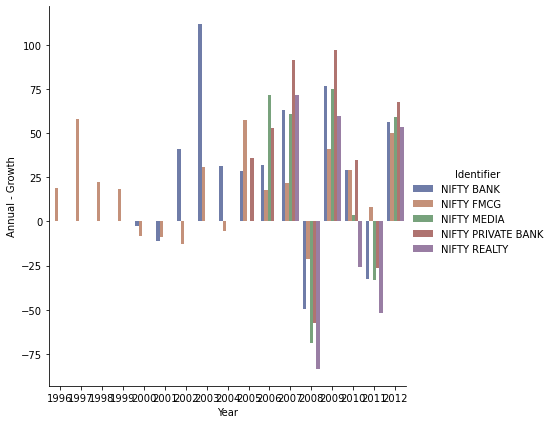

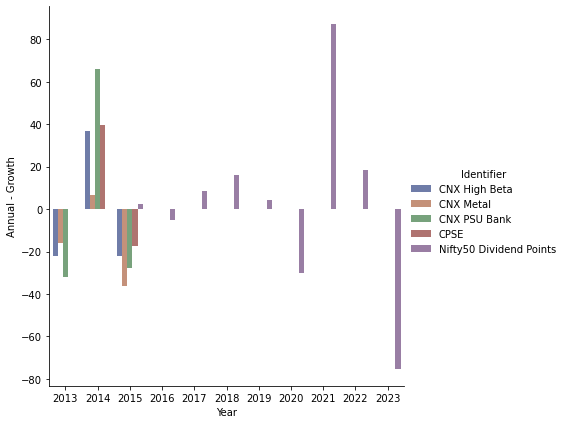

In [201]:
sns.catplot(x=period, y=label + " - Growth", 
  data=top5_gainers,
  kind="bar",
  hue="Identifier",
  palette="dark", alpha=.6, height=6
)
sns.catplot(x=period, y=label + " - Growth", 
  data=top5_loosers,
  kind="bar",
  hue="Identifier",
  palette="dark", alpha=.6, height=6
)

<AxesSubplot:xlabel='Year', ylabel='Annual - Growth'>

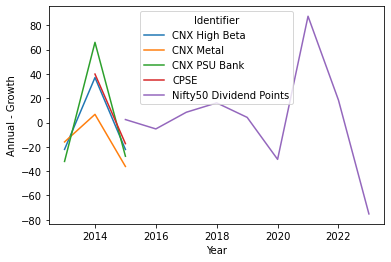

In [203]:
sns.lineplot(x=period, y="Annual - Growth", 
            hue="Identifier",
            data=top5_gainers)

sns.lineplot(x=period, y="Annual - Growth", 
             hue="Identifier",
             data=top5_loosers
            )

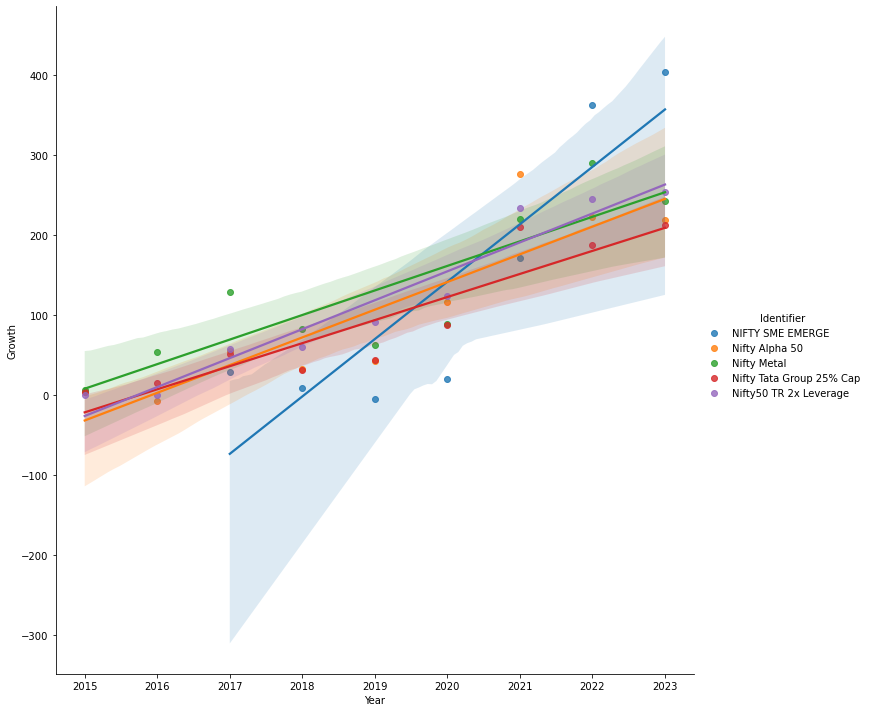

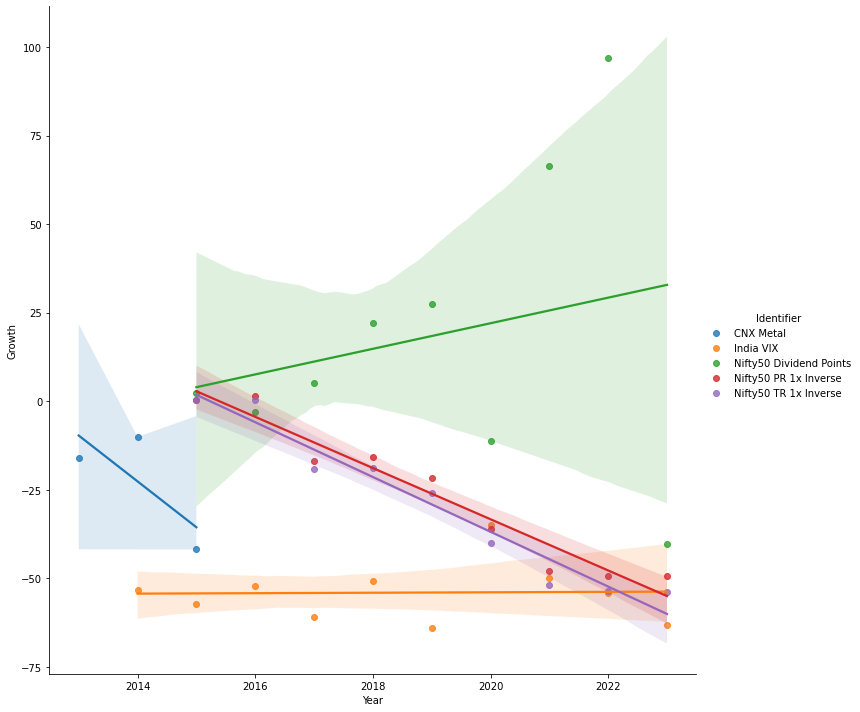

In [110]:
sns.lmplot(x=period, y="Growth", 
             hue="Identifier",
             data=top5_gainers,
    height=10
)
sns.lmplot(x=period, y="Growth", 
             hue="Identifier",
             data=top5_loosers,
    height=10
)

<AxesSubplot:xlabel='None-Year', ylabel='None-Year'>

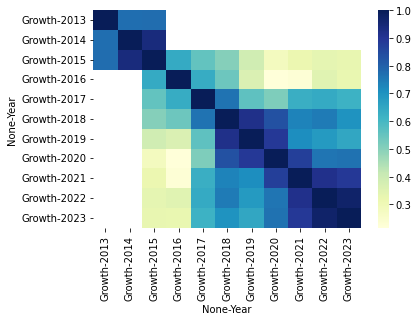

In [169]:
sns.heatmap(period_grouped[["Identifier", "Year", "Growth"]].pivot(index="Identifier", columns="Year", values=["Growth"]).corr(), cmap="YlGnBu", annot=False)

In [170]:
#period_grouped[["Identifier", "Year", "Growth"]].pivot_table(index=["Identifier"], columns=["Year"], values=["Growth"])
period_grouped[["Year", "Identifier", "Growth"]].pivot(index="Identifier", columns="Year", values="Growth").corr()

Year      2013      2014      2015      2016      2017      2018      2019  \
Year                                                                         
2013  1.000000  0.773048  0.774601       NaN       NaN       NaN       NaN   
2014  0.773048  1.000000  0.940004       NaN       NaN       NaN       NaN   
2015  0.774601  0.940004  1.000000  0.640502  0.554007  0.502239  0.388675   
2016       NaN       NaN  0.640502  1.000000  0.634746  0.538238  0.363409   
2017       NaN       NaN  0.554007  0.634746  1.000000  0.762162  0.561290   
2018       NaN       NaN  0.502239  0.538238  0.762162  1.000000  0.919988   
2019       NaN       NaN  0.388675  0.363409  0.561290  0.919988  1.000000   
2020       NaN       NaN  0.280582  0.216095  0.510502  0.832168  0.890518   
2021       NaN       NaN  0.319275  0.226430  0.629259  0.732732  0.709287   
2022       NaN       NaN  0.336785  0.348257  0.639698  0.746410  0.682157   
2023       NaN       NaN  0.327518  0.325740  0.619347  0.701859  0.649510   

Year      2020      2021      2022      2023  
Year                                          
2013       NaN       NaN       NaN       NaN  
2014       NaN       NaN       NaN       NaN  
2015  0.280582  0.319275  0.336785  0.327518  
2016  0.216095  0.226430  0.348257  0.325740  
2017  0.510502  0.629259  0.639698  0.619347  
2018  0.832168  0.732732  0.746410  0.701859  
2019  0.890518  0.709287  0.682157  0.649510  
2020  1.000000  0.875972  0.760989  0.766586  
2021  0.875972  1.000000  0.915900  0.892699  
2022  0.760989  0.915900  1.000000  0.971268  
2023  0.766586  0.892699  0.971268  1.000000